$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 20165549\ \ JANG\ \ JAE\ \ YONG$$

**Build a binary classifier based on k random features for each digit against all the other digits at MNIST dataset.**

**1. Compute an optimal model parameter using the training dataset for each classifier $f_d(x, w)$**

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import *

#
# Load MNIST training dataset
#
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data    	= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image
im_size = size_row * size_col    # 784
num_image	= len(data)  # 60000
count   	= 0     # count for the number of images


#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):
    
    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:
    line_data   = line.split(',')
    label       = int(line_data[0])   # Convert string to integer type
    im_vector   = np.asfarray(line_data[1:])
    #im_vector   = normalize(im_vector)
    
    list_label[count] = label
    list_image[:, count] = im_vector.copy()
    
    count += 1

In [73]:
n = 1024

A = np.empty((num_image, n+1), dtype=float)
b = np.empty((num_image, 1), dtype=float)

r = np.random.randn(n, im_size)
rx = np.empty((num_image, n), dtype=float)

for i in range(num_image):
    rx[i, :] = r.dot(list_image[:, i])
    normalize(rx[i, :])
    
# 랜덤 숫자
# Noise for obtaining the inverse matrix
for i in range(num_image):
    for j in range(n+1):
        if j == 0:
            A[i, j] = 1
        else:
            A[i, j] = rx[i, j-1]

In [74]:
A = np.where(A > 0, A, 0)

A = np.asmatrix(A)
b = np.asmatrix(b)
theta_list = np.empty((n+1, 10), dtype=float)

for j in range(10):
    for i in range(num_image):
        if list_label[i] == j:
            b[i] = 1
        else:
            b[i] = -1
    theta = inv(A.T*A)*A.T*b
    th = np.asfarray(theta)
    theta_list[:, j] = th[:, 0]

**2. Compute (1) true positive rate, (2) error rate using (1) training dataset and (2) testing dataset.**

In [98]:
train_b = np.matrix((n+1, 1), dtype=float)
tr_label_cnt = 0  # answer positive count
tr_tp = 0    # true positive count
tr_fp = 0    # false positive count
tr_tn = 0    # true negative count
tr_fn = 0    # false negative count

for j in range(10):
    train_th = theta_list[:, j]
    train_th = np.asmatrix(train_th)
    x = train_th.T
    train_b = A * x

    for i in range(num_image):
        if list_label[i] == j:
            if train_b[i] > 0:
                tr_tp += 1
            else:
                tr_fn += 1
            tr_label_cnt += 1
        else:
            if train_b[i] <= 0:
                tr_tn += 1
            else:
                tr_fp += 1

In [75]:
file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
test_data    	= handle_file.readlines()
handle_file.close()

size_data = len(test_data)    # 10000
count = 0   # count for the number of images

#
# make a matrix each column of which represents an images in a vector form
#
test_image  = np.empty((size_row * size_col, size_data), dtype=float)
test_label  = np.empty(size_data, dtype=int)


for line in test_data:
    test_line   = line.split(',')
    label       = int(test_line[0])   # Convert string to integer type
    test_vector   = np.asfarray(test_line[1:])
    #test_vector   = normalize(test_vector)
    
    test_label[count] = label
    test_image[:, count]    = test_vector.copy()
    
    count += 1

In [76]:
test_A = np.empty((size_data, n+1), dtype=float)
test_th = np.empty((n+1, 1), dtype=float)
accuracy = np.empty(size_data, dtype=float)
errorRate = np.empty(size_data, dtype=float)

test_rx = np.empty((size_data, n), dtype=float)

for i in range(size_data):
    test_rx[i, :] = r.dot(test_image[:, i])
    normalize(test_rx[i, :])
        
for i in range(size_data):
    for j in range(n+1):
        if j == 0:
            test_A[i, j] = 1
        else:
            test_A[i, j] = test_rx[i, j-1]

test_A = np.where(test_A > 0, test_A, 0)
test_A = np.asmatrix(test_A)

In [77]:
true_positive = np.empty(size_data, dtype=float)
false_positive = np.empty(size_data, dtype=float)
true_negative = np.empty(size_data, dtype=float)
false_negative = np.empty(size_data, dtype=float)

tp_list = np.empty(10, dtype=float)
error_list = np.empty(10, dtype=float)
accuracy_list = np.empty(10, dtype=float)

def compute(label_number):
    test_th = theta_list[:, label_number]
    test_th = np.asmatrix(test_th)
    x = test_th.T
    test_b = np.matrix((n+1, 1), dtype=float)
    test_b = test_A * x

    label_cnt = 0  # answer positive count
    nlabel_cnt = 0  # answer negative count 
    tp = 0    # true positive count
    fp = 0    # false positive count
    tn = 0    # true negative count
    fn = 0    # false negative count

    for i in range(size_data):
        if test_label[i] == label_number:
            if test_b[i] > 0:
                tp += 1
            else:
                fn += 1
            label_cnt += 1
        else:
            if test_b[i] <= 0:
                tn += 1
            else:
                fp += 1
            nlabel_cnt += 1

        if label_cnt != 0:
            true_positive[label_cnt] = (tp / label_cnt) * 100
            false_negative[label_cnt] = (fn / label_cnt) * 100

        if nlabel_cnt != 0:
            true_negative[nlabel_cnt] = (tn / nlabel_cnt) * 100
            false_positive[nlabel_cnt] = (fp / nlabel_cnt) * 100

        # testing accuracy
        accuracy[i] = (tp + tn) / (label_cnt + nlabel_cnt) * 100

        # error rate
        errorRate[i] = (fn + fp) / (label_cnt + nlabel_cnt) * 100
    
    tp_list[label_number] = tp
    error_list[label_number] = errorRate[size_data-1]
    accuracy_list[label_number] = accuracy[size_data-1]
    return(label_cnt, nlabel_cnt)

# . [True Positive Rate / Error Rate]

## . $Training\ Set$

In [100]:
# training ture-positive
tr_true_positive = tr_tp / tr_label_cnt * 100

# training accuracy
tr_accuracy = (tr_tp + tr_tn) / num_image / 10 * 100

# error rate
tr_errorRate = (tr_fn + tr_fp) / num_image / 10 * 100

print('Training Total True Positive : ', tr_true_positive, '%')
print()
print('Training Total Accuracy      : ', tr_accuracy, '%')
print('Training Total Error Rate    : ', tr_errorRate, '%')

Training Total True Positive :  87.425 %

Training Total Accuracy      :  98.54333333333332 %
Training Total Error Rate    :  1.4566666666666668 %


## . $Testing\ Set$

In [101]:
total_tp = 0
total_accuracy = 0
total_error = 0

for i in range(10):
    total_tp += tp_list[i]
    total_error += error_list[i]
    total_accuracy += accuracy_list[i]

total_tp = (total_tp / size_data) * 100
total_accuracy = total_accuracy / 10
total_error = total_error / 10

print('Testing Total True Positive : ', total_tp, '%')
print()
print('Testing Total Accuracy      : ', total_accuracy, '%')
print('Testing Total Error Rate    : ', total_error, '%')

Testing Total True Positive :  87.55 %

Testing Total Accuracy      :  98.539 %
Testing Total Error Rate    :  1.461 %


**$Label = 0$**

Accuracy Rate :  99.35000000000001 %
Error Rate    :  0.65 %

True Positive  :  95.40816326530613 %
false_negative :  4.591836734693878 %
true_negative  :  99.77827050997783 %
false_positive :  0.22172949002217296 %



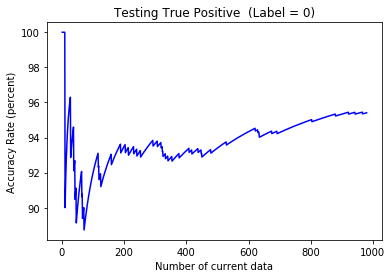

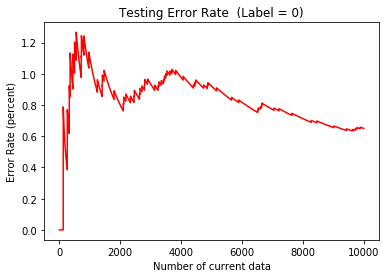

In [79]:
labelCount, nlabelCount = compute(0)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 0)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 0)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 1$**

Accuracy Rate :  99.49 %
Error Rate    :  0.51 %

True Positive  :  96.82819383259911 %
false_negative :  3.1718061674008813 %
true_negative  :  99.83079526226734 %
false_positive :  0.1692047377326565 %



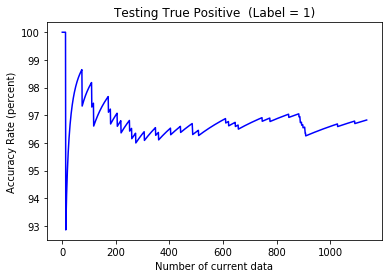

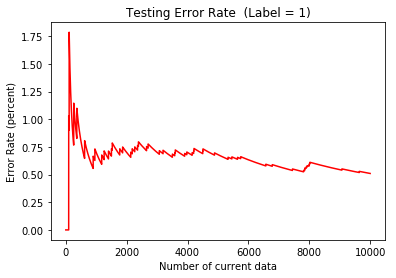

In [80]:
labelCount, nlabelCount = compute(1)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 1)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 1)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 2$**

Accuracy Rate :  98.47 %
Error Rate    :  1.53 %

True Positive  :  86.53100775193798 %
false_negative :  13.468992248062014 %
true_negative  :  99.84388938447815 %
false_positive :  0.15611061552185548 %



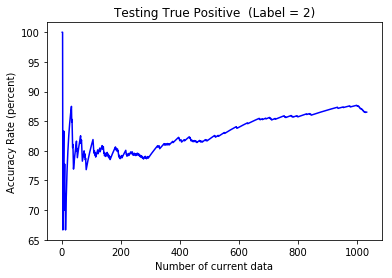

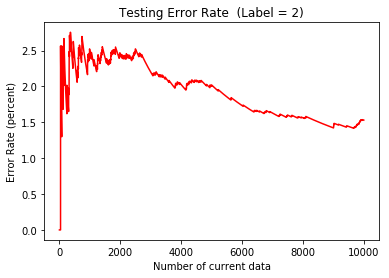

In [81]:
labelCount, nlabelCount = compute(2)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 2)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 2)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 3$**

Accuracy Rate :  98.35000000000001 %
Error Rate    :  1.6500000000000001 %

True Positive  :  85.24752475247524 %
false_negative :  14.752475247524751 %
true_negative  :  99.82202447163515 %
false_positive :  0.17797552836484984 %



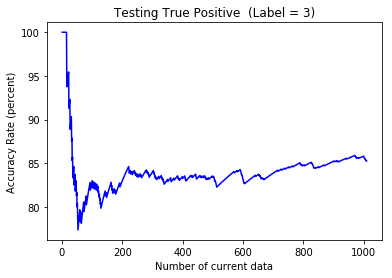

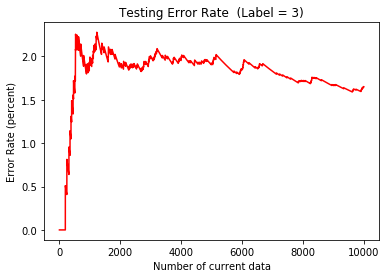

In [82]:
labelCount, nlabelCount = compute(3)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 3)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 3)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 4$**

Accuracy Rate :  98.45 %
Error Rate    :  1.55 %

True Positive  :  86.25254582484725 %
false_negative :  13.747454175152749 %
true_negative  :  99.77822133510756 %
false_positive :  0.22177866489243736 %



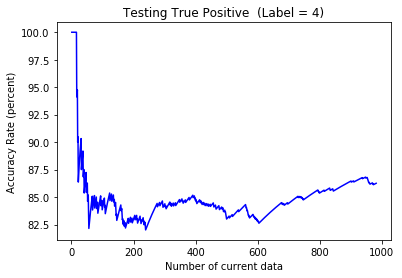

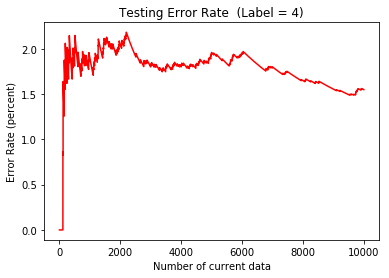

In [83]:
labelCount, nlabelCount = compute(4)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 4)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 4)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 5$**

Accuracy Rate :  98.26 %
Error Rate    :  1.7399999999999998 %

True Positive  :  82.847533632287 %
false_negative :  17.152466367713004 %
true_negative  :  99.76943346508564 %
false_positive :  0.230566534914361 %



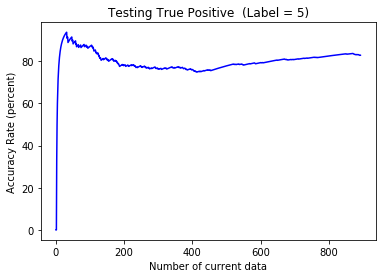

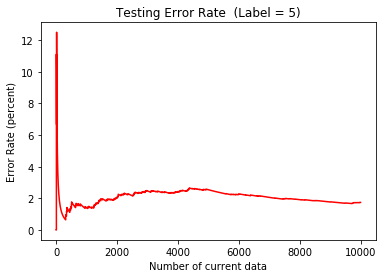

In [84]:
labelCount, nlabelCount = compute(5)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 5)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 5)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 6$**

Accuracy Rate :  98.95 %
Error Rate    :  1.05 %

True Positive  :  90.81419624217119 %
false_negative :  9.18580375782881 %
true_negative  :  99.81198849811989 %
false_positive :  0.18801150188011503 %



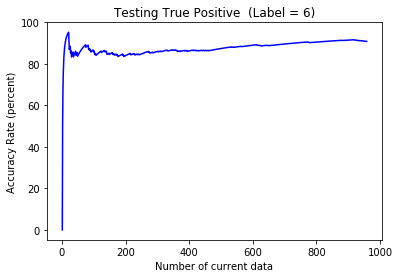

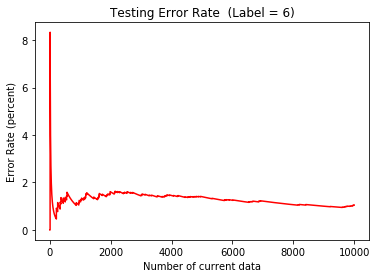

In [85]:
labelCount, nlabelCount = compute(6)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 6)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 6)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 7$**

Accuracy Rate :  98.52 %
Error Rate    :  1.48 %

True Positive  :  87.06225680933852 %
false_negative :  12.93774319066148 %
true_negative  :  99.83281319661168 %
false_positive :  0.16718680338831923 %



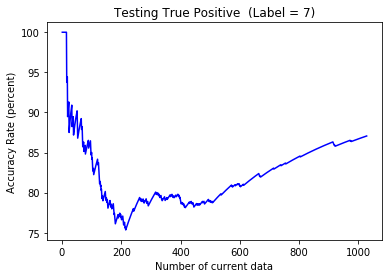

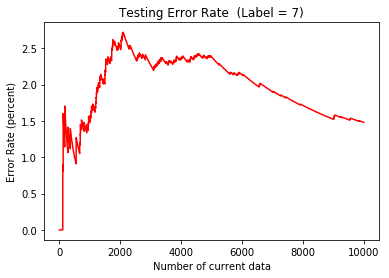

In [86]:
labelCount, nlabelCount = compute(7)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 7)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 7)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 8$**

Accuracy Rate :  97.63 %
Error Rate    :  2.37 %

True Positive  :  79.26078028747433 %
false_negative :  20.739219712525667 %
true_negative  :  99.6122313317084 %
false_positive :  0.38776866829160206 %



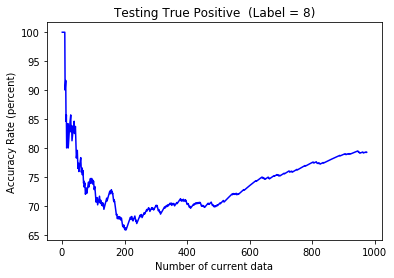

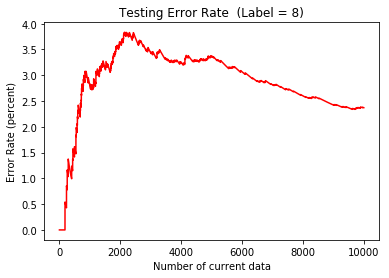

In [87]:
labelCount, nlabelCount = compute(8)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 8)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 8)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 9$**

Accuracy Rate :  97.92 %
Error Rate    :  2.08 %

True Positive  :  83.64717542120911 %
false_negative :  16.35282457879088 %
true_negative  :  99.52174396618841 %
false_positive :  0.4782560338115894 %



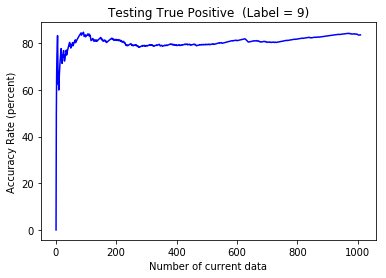

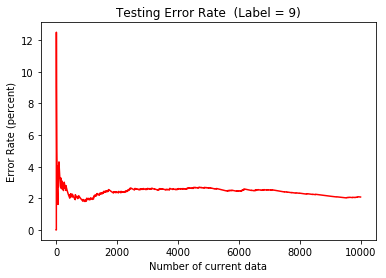

In [88]:
labelCount, nlabelCount = compute(9)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[nlabelCount]), '%')
print("false_positive : ", (false_positive[nlabelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 9)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 9)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()